# Iris

Import necessary packages. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score

## Introduction

Import the dataset 'iris.data', which contains data about the length, width and types of iris.

In [2]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv('iris.data', header=None,names=column_names)

print(iris_data.head()) #print first 5 rows
print(iris_data.describe()) #print summary statistics
print(iris_data['class'].value_counts())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-versicolor   

From the overview above, we can find that there are three types of iris: setosa, versicolor and virginica. Each has 50 samples.
And there are 150 samples in total in this dataset. For each sample in this dataset, there are four features: sepal_length, sepal_width, petal_length and petal_width. The mean for sepal_length, sepal_width, petal_length and petal_width are 5.84, 3.05, 3.76 and 1.20, respectively.

### Visualization

Plot the pair plot(scatter matrix plot) of the iris dataset and the boxplot for each variable  

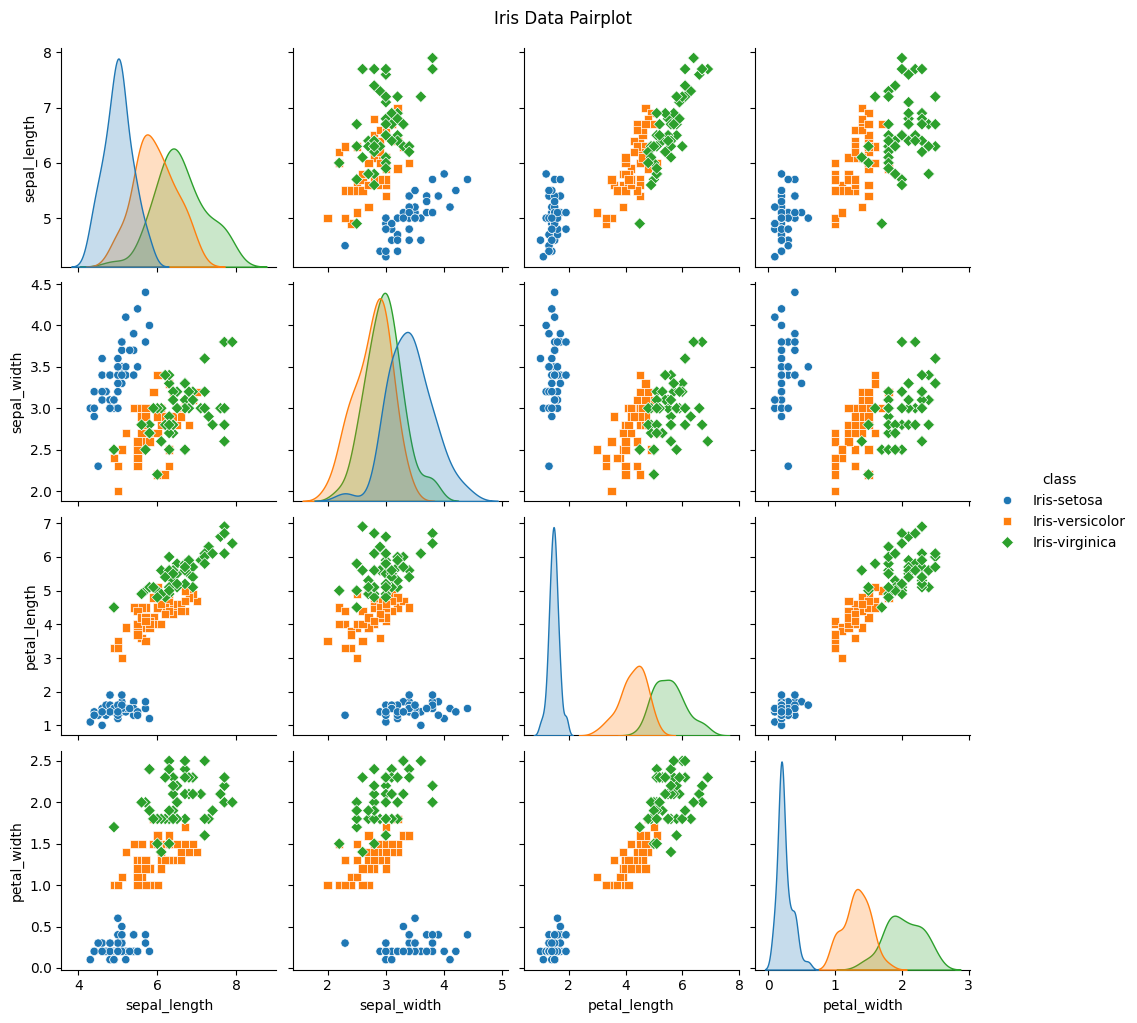

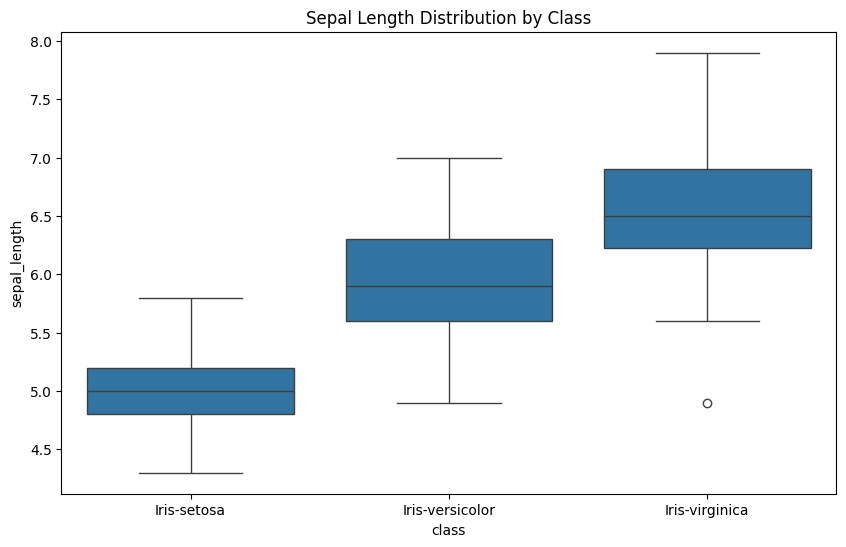

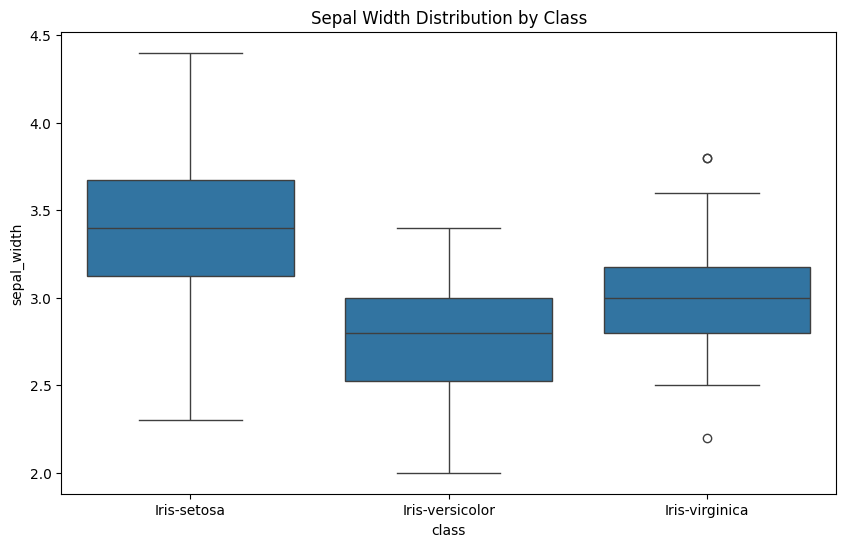

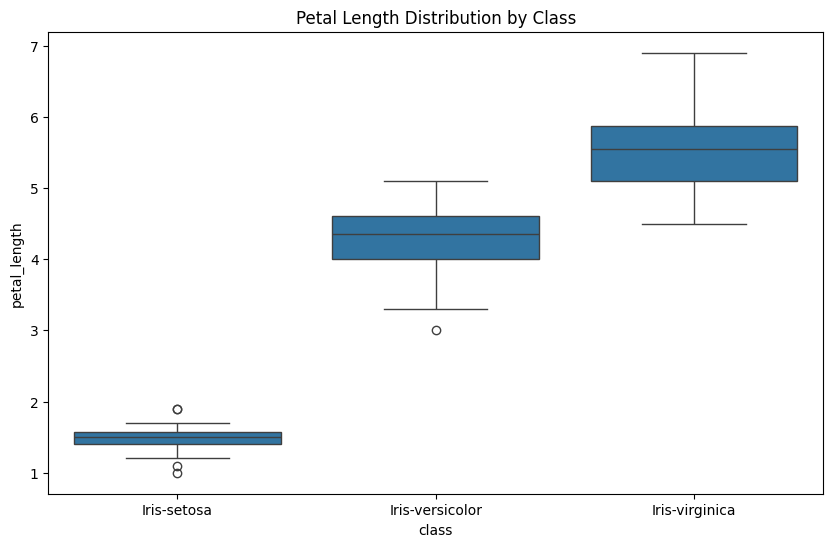

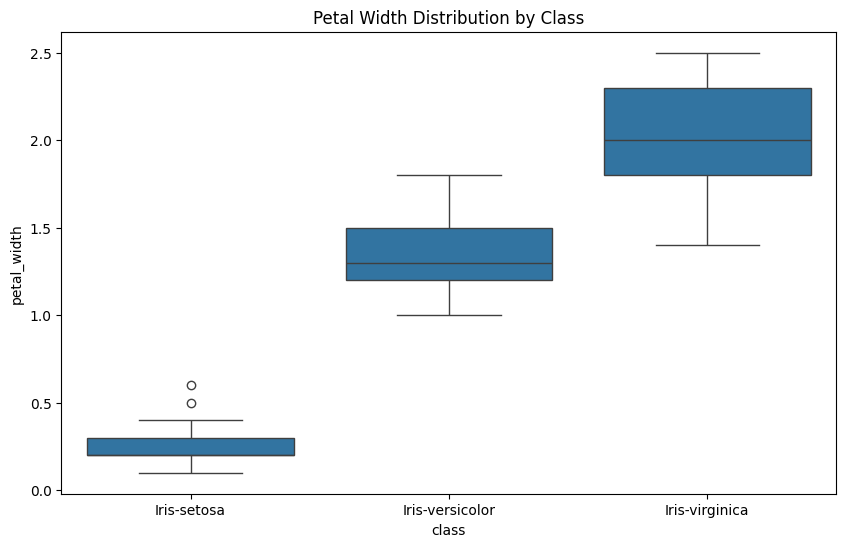

In [4]:
sns.pairplot(iris_data, hue='class',markers=["o", "s", "D"])
plt.suptitle("Iris Data Pairplot",y=1.02)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='class',y='sepal_length',data=iris_data)
plt.title("Sepal Length Distribution by Class")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='class',y='sepal_width',data=iris_data)
plt.title("Sepal Width Distribution by Class")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='class',y='petal_length',data=iris_data)
plt.title("Petal Length Distribution by Class")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='class',y='petal_width',data=iris_data)
plt.title("Petal Width Distribution by Class")
plt.show()


From the pairplot above, it's easy to find that iris-setosa (labeled with blue circles) is clearly separated from the other two species in petal_length and petal_width scatter plots. To be more specific, iris-setosa has significantly smaller petal_length and petal_width values, which can be used to distinguish it well from the other two species.

But for iris-versicolor (labeled with orange squares) and iris-virginica (labeled with green diamonds), these two species overlap in all four features. This suggests that it is relatively difficult to completely differentiate these two species based on these features alone, but iris-virginica generally has larger values than iris-versicolor in petal_length and petal_width.

What's more, there is a strong positive correlation between petal_length and petal_width (seen from the scattar plot of thses two variables), indicating a strong association between these two features in the dataset. In contrast, sepal_length and sepal_width show relatively weak correlation.

Iris-setosa has significantly different distributions in petal_length and petal_width compared to the other species, with lower and more concentrated values.

The distribution of sepal_width for the three species is fairly similar but has some distinctions. Iris-setosa has higher sepal_width values, while Iris-virginica’s values are slightly lower.
For the sepal_length feature, iris-virginica’s distribution is the highest, and iris-setosa’s is the lowest.

From the boxplots of four variables distribution, we can derive similar conclusion, such as iris-setosa can be easily separated from the other two by petal_length or petal_width and iris-setosa has lower and more concentrated values in petal_length and petal_width distributions.

## Supervised Learning

In this section, I conducted supervised learning, including three different methods: **Logistic Regression**(Linear Regression), **Random Forest**, **Decision Tree**. And then I used cross validation with 5 folds for model selection. 

Import necessary packages needed in supervised learning.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [14]:
X = iris_data.drop('class', axis=1)
y = iris_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # split data into 70% for training, 30% for testing

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Logistic Regression': LogisticRegression(max_iter=200)
}

for model_name, model in models.items():
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # 5-fold cross validation
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy') # cross validation on the training set, using accuracy as the scoring metric
    print(f"{model_name} Cross-Validation Accuracy on Training Set: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})") # print the mean and standard deviation of the scores

Decision Tree Cross-Validation Accuracy on Training Set: 0.9143 (+/- 0.0356)
Random Forest Cross-Validation Accuracy on Training Set: 0.9143 (+/- 0.0356)
Logistic Regression Cross-Validation Accuracy on Training Set: 0.9524 (+/- 0.0301)


From the result above, we can easily derive that the standard deviation for three methods above are similar, but Logistic Regression has the best Cross-Validation Accuracy on the training set. Therefore, we should choose Logistic Regression as our supervised learning model here. 

With Logistic Regression model chosen, I used this model fitted by all training data to predict the test data. Then compared the prediction of y test data with actual y test data. 

In [19]:
model = models['Logistic Regression']
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  
test_score = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy on Test Set: {test_score:.4f}")


Logistic Regression Accuracy on Test Set: 1.0000


It's easy to know that the logistic regression accuracy of prediction for y test data is very high or 100% accurate. In other word, in this case, logistic regression is a very good model for prediction.

## Unsupervised Learning

In this section, I conducted unsupervised learning, including two different methods: **PCA** and **Autoencoder** to get new data in 2 dimension. And then based on the new data, I used **K-Means** algorithm to get the cluster label for each sample. Finally, I used silhouette_score to quantify the validation data prediction effect. At the same time, I used cross-validation with 5 folds to select the better model in PCA and Autoencoder.  

Import necessary packages needed for unsupervised learning.

In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import StratifiedKFold
from keras.models import Model
from keras.layers import Input, Dense

In [41]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42, stratify=np.zeros(X.shape[0]))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
pca_scores = []
autoencoder_scores = []

for train_index, val_index in skf.split(X_train, np.zeros(X_train.shape[0])):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    
    # PCA
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_fold)
    X_val_pca = pca.transform(X_val_fold)
    
    # KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_train_pca)
    pca_labels = kmeans.predict(X_val_pca)
    pca_scores.append(silhouette_score(X_val_pca, pca_labels))

    # Autoencoder
    input_dim = X_train_fold.shape[1]
    encoding_dim = 2 

    # Encoder & Decoder
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation='relu')(input_layer)
    decoder = Dense(input_dim, activation='sigmoid')(encoder)

    autoencoder = Model(input_layer, decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

 
    autoencoder.fit(X_train_fold, X_train_fold, epochs=50, batch_size=10, verbose=0)
    

    encoder_model = Model(input_layer, encoder)
    X_train_encoded = encoder_model.predict(X_train_fold)
    X_val_encoded = encoder_model.predict(X_val_fold)

 
    kmeans_autoencoder = KMeans(n_clusters=3, random_state=42)
    kmeans_autoencoder.fit(X_train_encoded)
    autoencoder_labels = kmeans_autoencoder.predict(X_val_encoded)

 
    if len(set(autoencoder_labels)) > 1: 
        autoencoder_scores.append(silhouette_score(X_val_encoded, autoencoder_labels))
    else:
        autoencoder_scores.append(-1)  


print(f"PCA Mean Silhouette Score: {np.mean(pca_scores):.4f}")
print(f"Autoencoder Mean Silhouette Score: {np.mean([score for score in autoencoder_scores if score != -1]):.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
PCA Mean Silhouette Score: 0.5847
Autoencoder Mean Silhouette Score: 0.5448


From the mean silhouette score result above, it's easy to find that PCA is better unsupervised learning method in this dataset, compared with self defined Autoencoder. So I would choose PCA method to work the test dataset.

Use PCA and then KMeans on the test dataset.

Test Set Silhouette Score: 0.6016


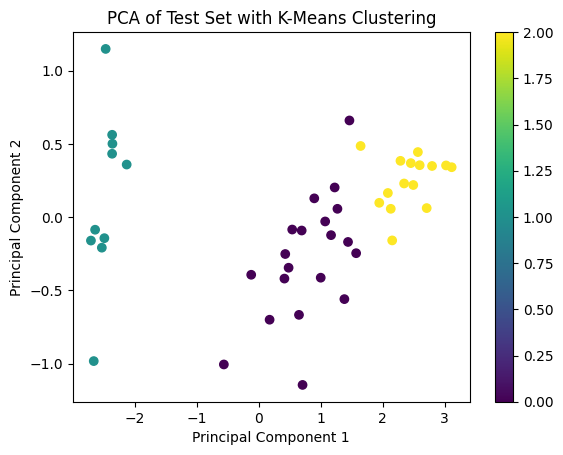

In [42]:
# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) 

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_pca)

# Predict on the test set
kmeans_labels_test = kmeans.predict(X_test_pca)

# Calculate the silhouette score
silhouette_test = silhouette_score(X_test_pca, kmeans_labels_test)

print(f"Test Set Silhouette Score: {silhouette_test:.4f}")

# Plot the PCA of the test set with KMeans clustering
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=kmeans_labels_test, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Test Set with K-Means Clustering')
plt.colorbar()
plt.show()

From the silhouette score and plot above, we can find that first doing PCA on test dataset, then conducting K-Means based on training dataset works very well in predicting the test data. And the plot shows that Principal Component 1 and 2 are good classifying criteria to separate test data into 3 clusters(i.e. iris species). Furthermore, this classification process can be finished by only Principal Component 1. 